In [22]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as pl

from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

from linear_tree.lineartree import LinearTreeRegressor

In [19]:
df = pd.read_csv("data/tunnel.csv",parse_dates=["Day"])
df = df.set_index("Day")
df['Time'] = np.arange(len(df.index))
print(df.shape)
df.head()

(747, 2)


,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [20]:
train = df[df.index < pd.to_datetime("2005-07-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2005-07-01", format='%Y-%m-%d')]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


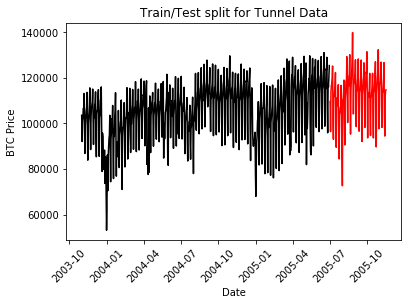

In [23]:
pl.plot(train.index,train.values[:,0], color = "black")
pl.plot(test.index,test.values[:,0], color = "red")
pl.ylabel('BTC Price')
pl.xlabel('Date')
pl.xticks(rotation=45)
pl.title("Train/Test split for Tunnel Data")
pl.show()

In [41]:
# Training data
X = train.loc[:, ['Time']]  # features
y = train.loc[:, 'NumVehicles']  # target

In [51]:
model = LinearTreeRegressor(Ridge(), criterion='rmse',max_depth=1)
model.fit(X,y)

LinearTreeRegressor(base_estimator=Ridge(), criterion='rmse', max_depth=1)

In [52]:
y_pred = pd.Series(model.predict(X), index=X.index)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


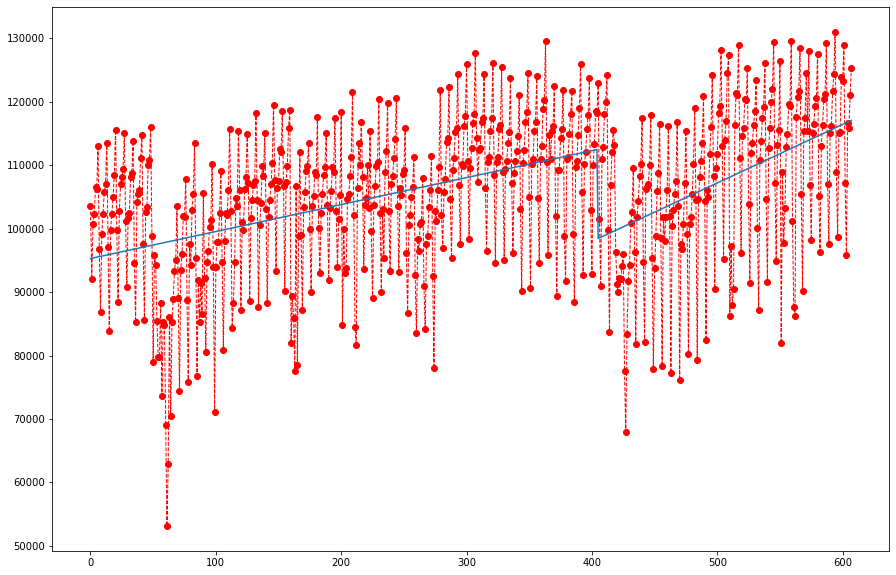

In [53]:
pl.figure(figsize=(15,10))

pl.plot(X.values,y,'r--o',lw=1)
pl.plot(X.values,y_pred)

In [54]:
X_test = test.loc[:, ['Time']]  # features
y_test = test.loc[:, 'NumVehicles']  # target

In [55]:
y_predict_test = model.predict(X_test)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


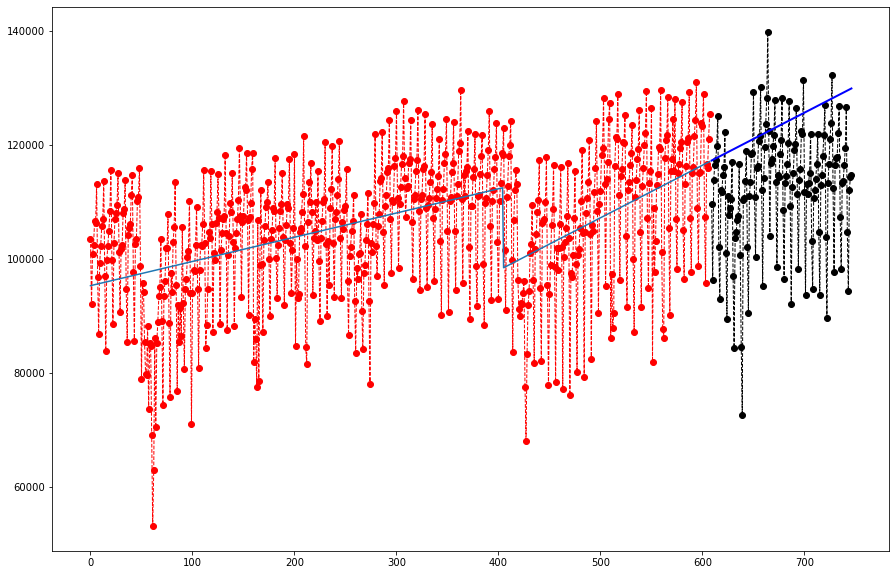

In [56]:
pl.figure(figsize=(15,10))

pl.plot(X.values,y,'r--o',lw=1)
pl.plot(X.values,y_pred)
pl.plot(X_test.values,y_test,'k--o',lw=1)
pl.plot(X_test.values,y_predict_test,"b-",lw=2)